# Global Carbon Emissions and Accountability
## An Exploratory Data Analysis (1990–Present)

---

**Author:** Stephen Ebuka Iheagwara  
**Program:** Internship / Students Industrial Work Experience Scheme (SIWES)  
**Host Institution:** CoLab Innovation Hub, Kaduna  
**Course:** Introduction to Data Science with Python  

**Location:** No. 4 Barnawa Close, Off Challawa Cres., Barnawa, Kaduna  

---

> **Note:** This project was developed as the capstone technical requirement for the SIWES internship at CoLab Innovation Hub. It demonstrates the application of Python's data science stack (Pandas, Matplotlib, Seaborn) to address real-world environmental data challenges.
> 
> **Abstract:** This notebook explores global CO₂ emission patterns to highlight the disparities between national output and individual accountability. By integrating global trends with a focused lens on Nigeria, it demonstrates the use of Python for climate informatics and policy-oriented data exploration.

## 1. Introduction
Climate change is driven primarily by anthropogenic carbon dioxide (CO₂) emissions resulting from fossil fuel combustion and industrial activity (IPCC, 2023). While global climate policies emphasize collective mitigation, emissions are unevenly distributed across countries, regions, and economic systems. Understanding these disparities requires not only aggregate analysis but also careful examination of per-capita contributions, energy sources, and economic context.


Exploratory Data Analysis (EDA) provides a suitable framework for uncovering patterns, trends, and disparities in large, multidimensional climate datasets. Rather than imposing predictive or causal assumptions, EDA emphasizes transparency and interpretability, making it particularly valuable for climate accountability and policy-oriented research (Tukey, 1977; Wilkinson, 2017).

This notebook presents an exploratory analysis of global carbon emissions from 1990 to the present, using data from Our World in Data. The analysis combines a global perspective with a focused examination of Africa, particularly Nigeria, in order to contextualize global trends within a locally relevant framework.

Data Source: Our World in Data – CO₂ and Greenhouse Gas Emissions (Our World in Data, 2023).

---

## 2. Data Loading and Initial Inspection
In this section, the dataset is loaded and inspected to understand its structure, scope, and suitability for analysis. This step is critical in exploratory analysis, as it informs subsequent decisions regarding variable selection, filtering, and data quality considerations.

### 2.1 Importing Required Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for publication-quality visuals
sns.set_theme(style="whitegrid")


*Interpretive note:*<br>The analysis relies on Python’s scientific stack. Pandas is used for data manipulation, while Matplotlib and Seaborn support high-quality visualizations suitable for academic reporting.

---

### 2.2 Loding the Dataset

In [18]:
# Load the dataset
df = pd.read_csv("owid-co2-data.csv")

# Display the first few rows
df.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Interpretive note:*<br>The dataset contains country-level observations across multiple years, with variables spanning emissions, population, energy sources, and economic indicators. Viewing the first few rows provides an initial sense of variable naming conventions and data organization.

---

### 2.3 Dataset Structure and Dimensions

In [4]:
# Check dataset shape
df.shape

(50411, 79)

In [88]:
# Inspect column names
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

*Interpretive note:*<br>The dataset contains country-level observations across multiple years, with variables spanning emissions, population, energy sources, and economic indicators. Viewing the first few rows provides an initial sense of variable naming conventions and data organization.

---

## 3. Temporal Scope Selection (1990–Present)
Although the dataset includes historical records dating back several centuries, this study focuses on the modern period from 1990 onward. This choice aligns with improved data reliability, reduced missing values, and the relevance of contemporary climate policy frameworks such as the Kyoto Protocol and the Paris Agreement (UNFCCC, 2015).

### 3.1 Filtering the Dataset by Year

In [8]:
# Filter data from 1990 onwards
df_modern = df[df["year"] >= 1990].copy()

# Confirm the temporal range
df_modern["year"].min(), df_modern["year"].max()


(1990, 2024)

*Interpretive note:*<br>Restricting the analysis to the modern period improves interpretability and ensures that observed trends reflect recent industrial, economic, and policy-driven dynamics rather than long-term historical distortions.

---

## 4. Variable Selection
Given the exploratory nature of the study, variables are selected to reflect multiple dimensions of carbon accountability:
- **Total emissions**: overall national contribution
- **Per-capita emissions**: equity and fairness perspective
- **Fuel-type emissions**: structural energy sources
- **Economic indicators**: contextual interpretation


### 4.1 Data Filtering and Technical Implementation
Out of the 70+ indicators available in the raw dataset, the core variables were selected based on their direct relevance to the research objectives. The implementation of this defensive selection strategy—designed to ensure robustness against dataset version changes—is shown in the Python routine below.

#### Table 4.1: Python Implementation of Variable Selection

In [73]:
# Core variables based on dataset availability
# and relevance to the study's accountability and energy-focus objectives

columns_of_interest = [
    "country", "iso_code", "year",
    "co2", "co2_per_capita",
    "coal_co2", "oil_co2", "gas_co2", "cement_co2", "flaring_co2",
    "gdp", "population"
]

# Select only columns that exist in the dataset to avoid runtime errors
df_selected = df_modern[[col for col in columns_of_interest if col in df_modern.columns]].copy()

df_selected.head()


,country,iso_code,year,co2,co2_per_capita,coal_co2,oil_co2,gas_co2,cement_co2,flaring_co2,gdp,population
240,Afghanistan,AFG,1990,2.024326,0.168054,0.278464,1.271408,0.403040,0.045766,0.025648,1.306598e+10,12045664.0
241,Afghanistan,AFG,1991,1.914301,0.156411,0.249627,1.204085,0.389125,0.045766,0.025697,1.204736e+10,12238879.0
242,Afghanistan,AFG,1992,1.482054,0.111609,0.021984,1.029584,0.362736,0.045766,0.021984,1.267754e+10,13278983.0
243,Afghanistan,AFG,1993,1.486943,0.099506,0.018320,1.047904,0.351744,0.046991,0.021984,9.834582e+09,14943175.0
244,Afghanistan,AFG,1994,1.453829,0.089462,0.014693,1.032171,0.337935,0.046991,0.022039,7.919856e+09,16250800.0


### 4.2 Analytical Justification
The rationale for choosing these specific variables is grounded in the need to balance absolute environmental impact with socioeconomic context.

#### Table 4.2: Variable Selection and Analytical Relevance

| Variable | Analytical Role |
| :--- | :--- |
| **country, iso_code** | Geographic identification and filtering (e.g., isolating Nigeria and excluding regional aggregates). |
| **year** | Temporal dimension for longitudinal trend analysis (1990–Present). |
| **co2** | Absolute emissions; captures total national environmental impact. |
| **co2_per_capita** | Equity and accountability metric; normalizes emissions by population for fair comparison. |
| **coal_co2, oil_co2, gas_co2** | Source attribution; identifies dominant fossil fuel drivers of emissions. |
| **flaring_co2** | Sector-specific relevance for oil-producing nations, particularly within the Nigerian context. |
| **gdp, population** | Contextual variables; support interpretation of economic and demographic drivers. |

---

**Interpretative Note:**<br>Column selection was guided by the study’s research objectives rather than by dataset completeness alone. A defensive selection strategy was adopted to ensure robustness and reproducibility, acknowledging that large international datasets may evolve across versions (Our World in Data, 2023).

**Why the “continent” column is missing:**<br>The OWID $CO_2$ dataset represents continental regions (e.g., Africa, Europe, Asia) as aggregate entries within the country field rather than as a dedicated continent variable. As a result, a standalone continent column is not consistently available in the raw CSV distribution of the dataset. 

Rather than a data omission, this reflects OWID’s flattened data architecture designed to facilitate direct comparisons between countries and continents; therefore, the analysis separates individual countries from group totals (like 'Africa' or 'World') to ensure the data stays accurate and isn't accidentally counted twice.

---

### 4.3 Feature Definitions
#### Table 4.3: Variable Definitions and Units of Measurement

| Variable | Column Name | Unit | Notes |
| :--- | :--- | :--- | :--- |
| **Total Emissions** | `co2` | Million Tonnes (Mt) | Absolute $CO_2$ mass emitted per year per country. |
| **Per-Capita Emissions** | `co2_per_capita` | Tonnes (t) | Average emissions per person. |
| **Economic Context** | `gdp` | International-$ | Adjusted for inflation & Purchasing Power Parity (PPP). |
| **Population** | `population` | Absolute Count | Total population of the country/region. |

**Important note:**
- Metric Tonnes (t) = 1,000 kg
- Million Tonnes (Mt) = 1,000,000 t

---

## 5. Missing Values and Data Quality Assessment
Before conducting any visual or statistical analysis, it is necessary to assess the extent of missing data. Missing values are common in large international datasets and must be interpreted carefully rather than removed indiscriminately.

### 5.1 Overview of Missing Values

In [35]:
df_selected.isna().sum()

country              0
iso_code          1253
year                 0
co2                266
co2_per_capita     815
coal_co2          3441
oil_co2            740
gas_co2           3961
flaring_co2       1112
gdp               3462
population         868
dtype: int64

**Interpretative Note:**<br>Patterns of missingness provide insight into data availability across regions and time. Rather than aggressively imputing values, this study treats missing data as an informative limitation, particularly for developing regions where reporting infrastructure may be weaker.

---

## 6. Global Carbon Emissions Trends (1990–Present)
### 6.1 Handling Missingness Before Aggregation
Before analyzing global trends, it is necessary to consider missing values in the emissions variables. As observed, missingness is more pronounced in fuel-specific and economic indicators, particularly for earlier years and developing regions. However, total CO₂ emissions (co2) exhibit relatively high coverage compared to disaggregated variables.

For global-level trend analysis, aggregation is performed **using available observations** only, under the assumption that missing values reflect reporting gaps rather than zero emissions. This approach is consistent with prior exploratory climate studies and avoids downward bias that would result from treating missing values as zero (Ritchie & Roser, 2020).

**Interpretive note:**<br>
>At this stage, the objective is to understand **overall temporal direction and magnitude**, not precise accounting. More granular handling of missingness will be applied in country-level analyses.

---

### 6.2 Constructing Global Emissions Over Time

Global emissions are derived by summing national CO₂ emissions across all countries for each year. Regional aggregates (e.g., “World”, “Africa”) are excluded to prevent double counting.

#### 6.2.1 Filtering Sovereign Countries

In [22]:
# Exclude aggregate regions by keeping rows with valid ISO country codes
df_countries = df_selected[df_selected["iso_code"].str.len() == 3].copy()

df_countries.head()

,country,iso_code,year,co2,co2_per_capita,coal_co2,oil_co2,gas_co2,flaring_co2,gdp,population
240,Afghanistan,AFG,1990,2.024326,0.168054,0.278464,1.271408,0.403040,0.025648,1.306598e+10,12045664.0
241,Afghanistan,AFG,1991,1.914301,0.156411,0.249627,1.204085,0.389125,0.025697,1.204736e+10,12238879.0
242,Afghanistan,AFG,1992,1.482054,0.111609,0.021984,1.029584,0.362736,0.021984,1.267754e+10,13278983.0
243,Afghanistan,AFG,1993,1.486943,0.099506,0.018320,1.047904,0.351744,0.021984,9.834582e+09,14943175.0
244,Afghanistan,AFG,1994,1.453829,0.089462,0.014693,1.032171,0.337935,0.022039,7.919856e+09,16250800.0



**Interpretive note:**<br>ISO-3 codes are used as a reliable proxy for sovereign states. This step ensures that global totals represent the sum of individual countries rather than pre-aggregated regions.
>

#### 6.2.2 Aggregating Global CO₂ Emissions

In [75]:
# Aggregate global CO2 emissions by year
global_co2 = (
    df_countries
    .groupby("year", as_index=False)["co2"]
    .sum()
)

global_co2.head()

,year,co2
0,1990,22184.273979
1,1991,22662.921002
2,1992,21966.606839
3,1993,22192.437121
4,1994,22389.768558


**Interpretative Note:**<br>The resulting series represents the total volume of carbon dioxide emissions from fossil fuel combustion and industrial activity worldwide for each year since 1990.

---

### 6.3 Visualizing Global Emissions Trends
Visualization plays a central role in EDA, allowing temporal patterns to emerge clearly and intuitively (Tukey, 1977).

#### 6.3.1 Global CO₂ Emissions Trend

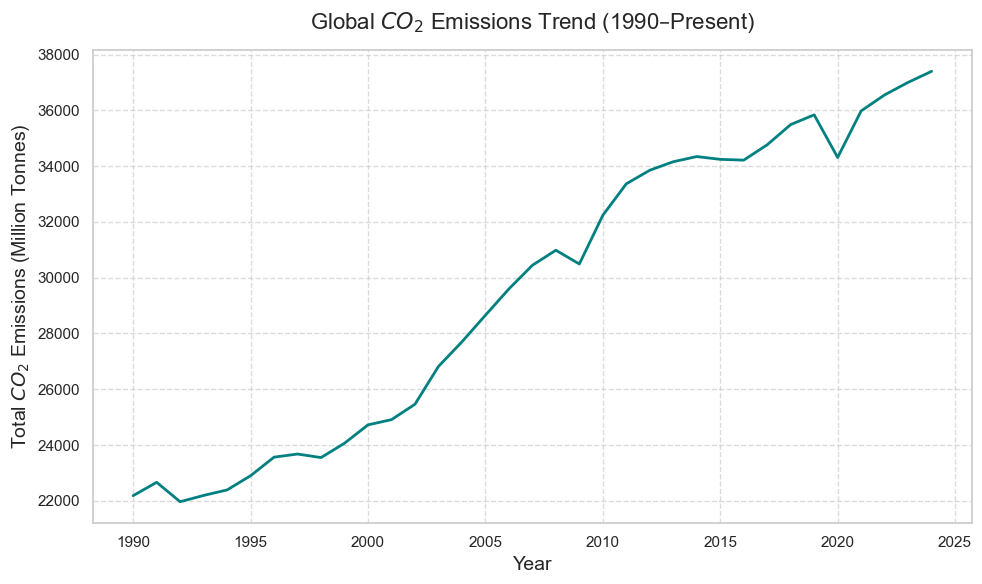

In [89]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_co2, x="year", y="co2", color="teal", linewidth=2)

# Using 'r' for raw string and '$' for LaTeX math mode
plt.title(r"Global $CO_2$ Emissions Trend (1990–Present)", fontsize=16, pad=15)
plt.xlabel("Year", fontsize=14)
plt.ylabel(r"Total $CO_2$ Emissions (Million Tonnes)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6.4 Interpretation of Global Trends

The global emissions trajectory from 1990 to the present reveals a persistent upward trend, indicating that worldwide carbon dioxide emissions have continued to increase despite decades of international climate negotiations. While the overall pattern reflects a structural dependence on fossil fuels, the data highlights clear temporary declines during major global disruptions:<br>
- **The 2008–2009 Global Financial Crisis:** A visible dip in emissions followed the collapse of major housing markets and banks (Peters et al., 2012), which led to a sharp contraction in industrial activity and energy demand across developed economies.
  
- **The 2020 COVID-19 Pandemic:** The most significant decline in modern history (Le Quéré et al., 2020), caused by unprecedented global lockdowns, the grounding of international aviation, and a near-total halt in regional transportation.

Despite these interruptions, the rapid "rebound" of emissions following each crisis suggests that global economic recovery remains tightly coupled with carbon-intensive energy consumption

Notably, the post-2000 period shows a sharper increase in emissions, coinciding with rapid industrialization in emerging economies and increased global energy demand. This observation aligns with existing literature emphasizing the role of economic expansion and energy-intensive development in driving recent emissions growth (Peters et al., 2012; IPCC, 2023).

***Why this matters:***<br>
This trend underscores the challenge facing global climate governance: policy commitments have thus far been insufficient to offset growth in emissions driven by economic and population dynamics. The persistence of rising emissions highlights the importance of examining **who contributes most, how emissions are generated, and whether growth patterns differ across regions and countries**.

---

### 6.5 Linking Global Trends to the Accountability Narrative

While global aggregates provide essential context, they mask significant heterogeneity across countries. High-emitting nations may dominate global totals, while low-emitting countries contribute marginally despite large populations. Consequently, global trends alone are insufficient for assessing responsibility or fairness.

This motivates the next stages of analysis, which decompose global emissions into:

- country-level contributions,
- per-capita comparisons, and
- fuel-specific emission structures.

Such decomposition enables a more nuanced understanding of accountability in the global climate system, consistent with equity-focused climate research (Davis & Caldeira, 2010).

---

## 7. National Contributions and the Pareto Principle
### 7.1 The Concentration of Total Emissions
The analysis aims to determine if global carbon output follows the Pareto Principle (the 80/20 rule), a phenomenon frequently observed in data science where a disproportionately small number of entities—in this case, nations—are responsible for the vast majority of total emissions. Establishing this concentration of responsibility is fundamental to the accountability narrative, as it distinguishes between high-impact industrial powers and low-emitting developing regions.

---

#### **Table 7.1: Variable Definitions and Units of Measurement**

| Variable | Column Name | Unit | Notes |
| :--- | :--- | :--- | :--- |
| **Total Emissions** | `co2` | Million Tonnes (Mt) | Absolute $CO_2$ mass emitted per year per country. |
| **Per-Capita Emissions** | `co2_per_capita` | Tonnes (t) | Average emissions per person. |
| **Economic Context** | `gdp` | International-$ | Adjusted for inflation & Purchasing Power Parity (PPP). |
| **Population** | `population` | Absolute Count | Total population of the country/region. |

**Important note:**
- Metric Tonnes (t) = 1,000 kg
- Million Tonnes (Mt) = 1,000,000 t

---

#### Code: Top 10 Emitters (Latest Year)

In [39]:
# Identify the latest year in the dataset
latest_year = df_selected['year'].max()

# Filter only countries (exclude aggregates like 'World' or 'Europe')
countries_only = df_selected[df_selected['iso_code'].notna()]

# Select top 10 emitters by total CO2
top_10_emitters = countries_only[countries_only['year'] == latest_year].nlargest(10, 'co2')

# Display table
top_10_emitters[['country', 'co2', 'co2_per_capita']]


,country,co2,co2_per_capita
9933,China,12289.037109,8.658390
48007,United States,4904.119629,14.197287
21762,India,3193.478027,2.200978
38314,Russia,1780.524414,12.294705
23812,Japan,961.867310,7.772474
21937,Indonesia,812.220215,2.865096
22662,Iran,792.631165,8.656227
40289,Saudi Arabia,692.133484,20.379194
43038,South Korea,583.679138,11.285893
18319,Germany,572.319153,6.768824


#### 7.1.2 Visualization: Top 10 Global CO₂ Emitters

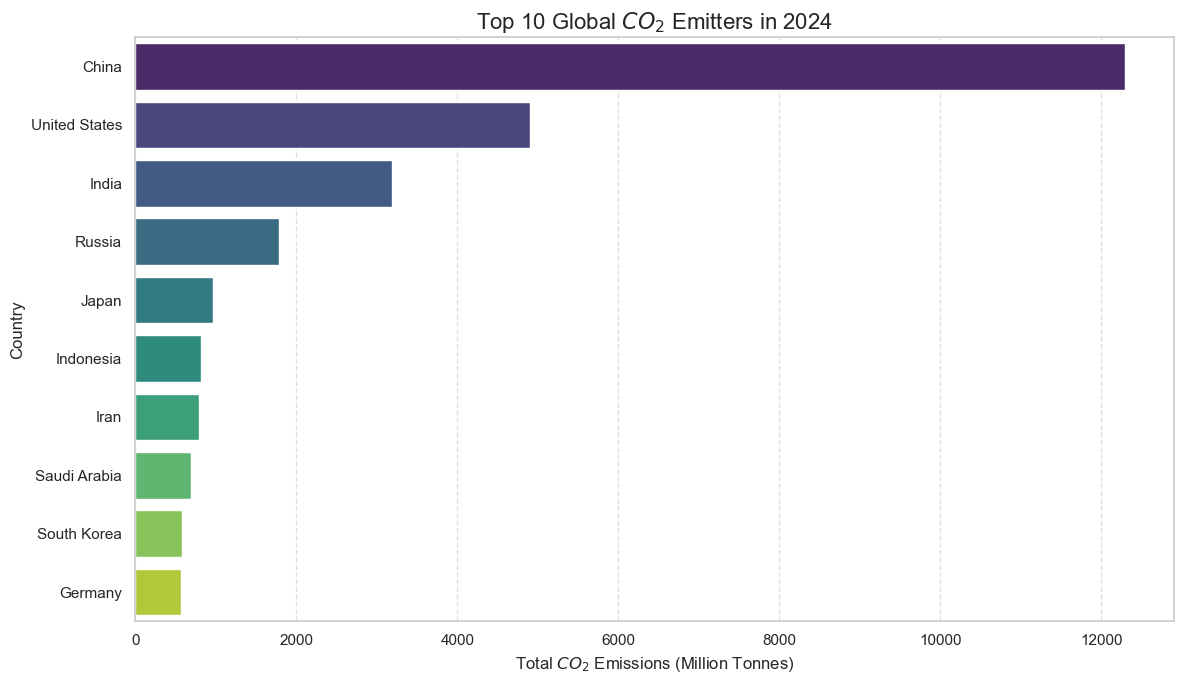

In [34]:
plt.figure(figsize=(12, 7))

# Added hue='country' and legend=False to satisfy the new Seaborn requirements
sns.barplot(
    data=top_10_emitters, 
    x='co2', 
    y='country', 
    hue='country', 
    palette='viridis', 
    legend=False
)

plt.title(f"Top 10 Global $CO_2$ Emitters in {latest_year}", fontsize=16)
plt.xlabel("Total $CO_2$ Emissions (Million Tonnes)")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### 7.1.3 Interpretive Note: Concentration of Responsibility
> **Observation**: The bar chart confirms the significant heterogeneity in global carbon emissions. A small fraction of the world’s approximately 195 countries accounts for a disproportionate share of total global emissions. The magnitude of the gap between the top three emitters and the remaining countries is particularly striking.

> **Accountability Insight**: Although global emissions exhibit an overall upward trend, the primary drivers of this increase are concentrated in a limited number of industrialized and rapidly developing economies. This demonstrates that aggregate global figures can obscure national-level responsibility. Consequently, climate mitigation strategies must differentiate between major emitters and developing countries—such as Nigeria—which contribute relatively little to global totals yet experience substantial climate-related vulnerabilities.

> **Relevance to Project Theme**: These findings reinforce the study’s accountability narrative by empirically demonstrating that mitigation responsibility is highly concentrated, thereby supporting equity-informed and policy-relevant climate governance.

---
### 7.2 Normalizing Responsibility: The Per-Capita Perspective

To understand individual footprints, we normalize the absolute emissions by the total population of each country. This reveals a different set of primary contributors compared to total mass.

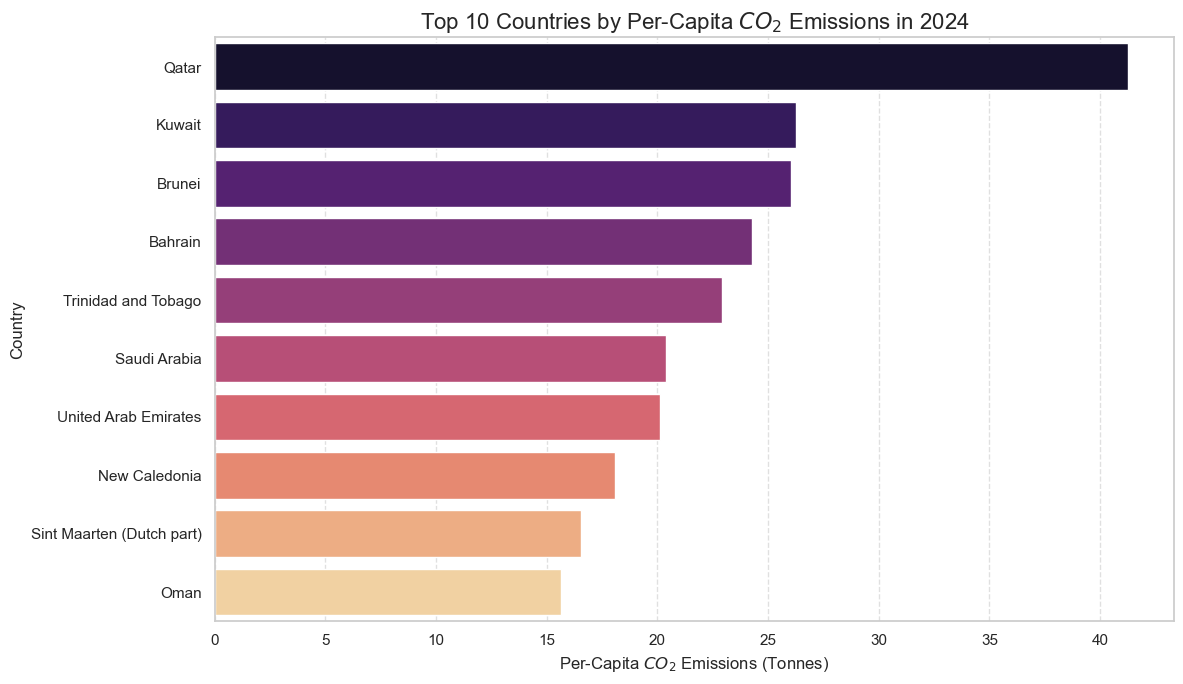

In [38]:
# Select top 10 countries by per-capita CO2 emissions (latest year)
top_10_per_capita = countries_only[countries_only['year'] == latest_year] \
    .nlargest(10, 'co2_per_capita')

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_per_capita,
    x='co2_per_capita',
    y='country',
    hue='country',
    palette='magma',
    legend=False
)

plt.title(f"Top 10 Countries by Per-Capita $CO_2$ Emissions in {latest_year}", fontsize=16)
plt.xlabel("Per-Capita $CO_2$ Emissions (Tonnes)")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 7.2.1 Interpretation of Per-Capita Trends
**Interpretive Note: Per-Capita Emissions and Carbon Equity**<br>
While the analysis of total emissions emphasizes the dominance of large industrial economies, the per-capita perspective shifts attention toward the intensity of resource consumption at the individual level. This reframing reveals a fundamentally different pattern of responsibility.

**Wealth and Emissions Intensity**: Countries with relatively small populations but high income levels—particularly energy-exporting states such as Qatar, the United Arab Emirates, and Kuwait—emerge as leading per-capita emitters. This indicates that average individual carbon footprints in these countries are substantially higher than those observed in most developing regions.

**Ethical Dimensions of Accountability**: These findings challenge narratives that implicitly attribute climate responsibility primarily to populous developing nations. When emissions are normalized by population, it becomes evident that a comparatively small number of individuals in specific regions consume a disproportionate share of the global carbon budget.

**Implications for Nigeria**: As the analysis transitions toward a focused examination of Nigeria, this per-capita comparison establishes a baseline for evaluating carbon equity. It provides empirical support for the principle of **Common but Differentiated Responsibilities (CDR)**, underscoring why developing countries argue for climate policies that account for historical emissions, consumption patterns, and developmental context.

---

## 8 Global Fuel Mix Analysis
While identifying the leading nations in carbon output establishes geographic accountability, a comprehensive understanding of the climate crisis requires an analysis of the structural drivers behind these totals. This section shifts the focus from who is emitting (national entities) to what is being burned (fossil fuel sources). By decomposing global emissions into their primary chemical and industrial origins—Coal, Oil, Natural Gas, Gas Flaring, and Cement Production—we can identify the specific energy dependencies that maintain the global emissions trajectory. This "source attribution" is a prerequisite for evaluating national responsibility, as it reveals whether a country’s carbon footprint is driven by base-load power generation, industrial manufacturing, or extractive sector inefficiencies.

### 8.1 Emission Trends by Primary Fuel Source (1990–Present)
**Methodological Note**: To ensure data integrity and avoid the risk of double-counting national and regional totals, this analysis utilizes the pre-aggregated "World" data provided by the Our World in Data (OWID) dataset. A stacked area chart was selected as the primary visualization tool to simultaneously illustrate two critical dimensions: the growth in the absolute volume of global emissions and the shifting proportion of the individual fuel sources—Coal, Oil, Gas, Flaring, and Cement—that comprise the global total. The following routine isolates these fuel-specific variables and generates a cumulative visualization to highlight the structural shifts in the global energy mix:

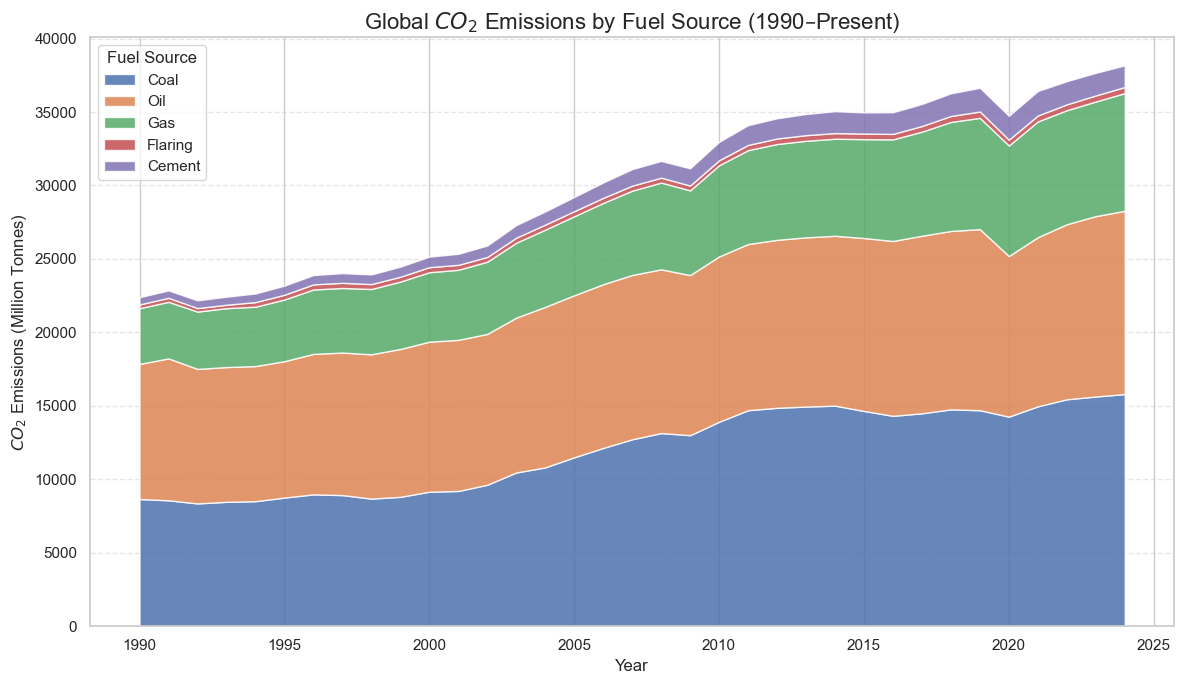

In [43]:
# Select global (World) data directly from OWID
fuel_sources = ['coal_co2', 'oil_co2', 'gas_co2', 'flaring_co2', 'cement_co2']

global_fuel_mix = (
    df_selected[df_selected['country'] == 'World']
    [['year'] + fuel_sources]
    .dropna(subset=['coal_co2', 'oil_co2', 'gas_co2'])
    .sort_values('year')
)

# Plot stacked area chart
plt.figure(figsize=(12, 7))

plt.stackplot(
    global_fuel_mix['year'],
    global_fuel_mix['coal_co2'],
    global_fuel_mix['oil_co2'],
    global_fuel_mix['gas_co2'],
    global_fuel_mix['flaring_co2'],
    global_fuel_mix['cement_co2'],
    labels=['Coal', 'Oil', 'Gas', 'Flaring', 'Cement'],
    alpha=0.85
)

plt.title(r"Global $CO_2$ Emissions by Fuel Source (1990–Present)", fontsize=16)
plt.xlabel("Year")
plt.ylabel(r"$CO_2$ Emissions (Million Tonnes)")
plt.legend(loc='upper left', title="Fuel Source")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### 8.1.1 Interpretive Note: The Anatomy of Global Emissions
The stacked area chart illustrates the structural composition of global carbon emissions over the modern period, revealing how different fossil fuel sources collectively drive the upward trajectory of total emissions.

**Coal Dominance**: Coal remains the single largest contributor to global emissions throughout the period, underscoring the central role of coal-based electricity generation and heavy industry in shaping global climate outcomes.

**Oil and Gas Dynamics**: Oil-related emissions show steady growth, reflecting sustained demand from transportation and petrochemical sectors. Natural gas emissions increase more rapidly in recent decades, suggesting a global transition toward gas as a perceived lower-carbon alternative, despite its continued contribution to rising total emissions.

**Flaring and Industrial Sources**: Although gas flaring and cement production contribute relatively small shares at the global level, they represent concentrated sources of emissions in specific regions, particularly in oil- and gas-producing economies.

**Analytical Transition**: This global fuel baseline provides a necessary reference for national-level analysis. Countries with coal-intensive energy systems face fundamentally different mitigation challenges from oil- and gas-dependent economies. This distinction is critical for interpreting Nigeria’s emissions profile in the subsequent case study.

---

## 9. Comparative Analysis: Nigeria vs. Global Emission Trajectories
The global baseline established in Chapter 8 provides the scale of the climate challenge, but it does not account for the specific growth rates of developing economies. This section compares Nigeria’s absolute emissions against the global average to determine if Nigeria’s contribution is following, leading, or lagging behind the global trend.

### 9.1 Comparative Time-Series Analysis (1990–Present)
**Methodological Implementation: Data Alignment and Visualization**

In [79]:
# Filter data for Nigeria and World
nigeria_data = df_selected[df_selected['country'] == 'Nigeria']
world_data = df_selected[df_selected['country'] == 'World']

# Ensure the same time range
common_years = set(nigeria_data['year']).intersection(world_data['year'])

nigeria_data = nigeria_data[nigeria_data['year'].isin(common_years)]
world_data = world_data[world_data['year'].isin(common_years)]


### 9.1.1 Visualizing Relative Emission Trends
To contextualize Nigeria's contribution within the global climate framework, the following visualization (Figure 9.1) compares Nigeria's annual $CO_2$ output against the global aggregate. This comparison highlights the massive disparity in absolute scale while providing a baseline for subsequent growth-rate analysis.

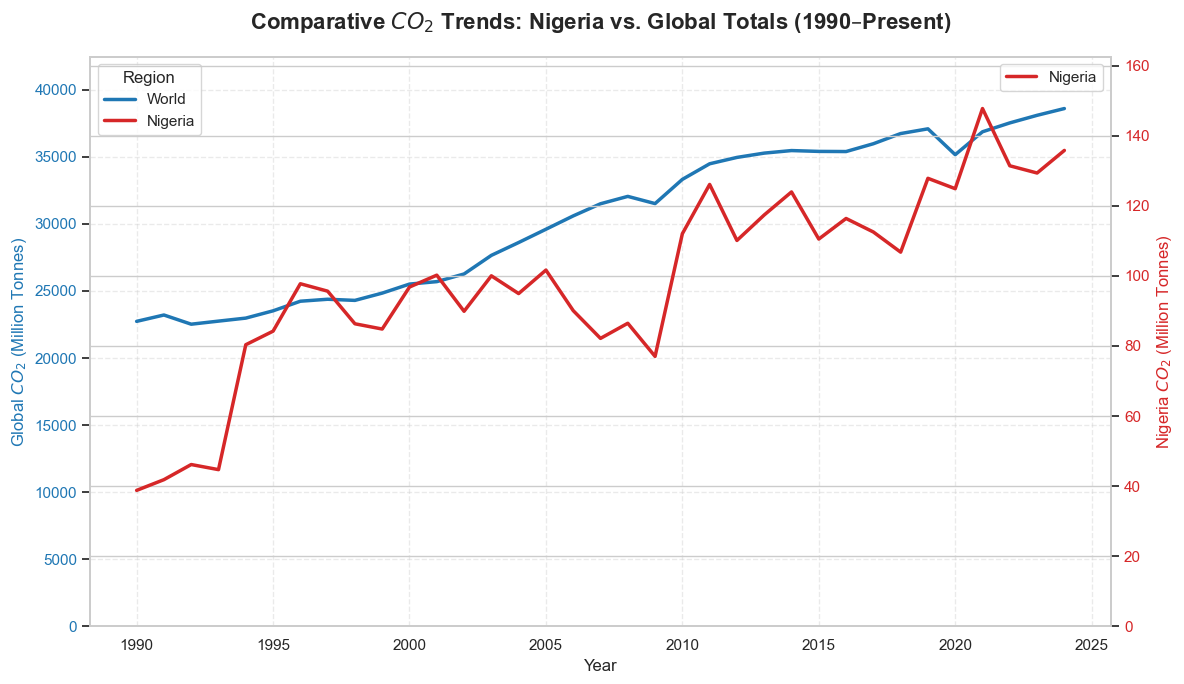

In [80]:
# Create the figure and the first axis (World)
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot World Data on Left Axis
color_world = '#1f77b4' 
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel(r'Global $CO_2$ (Million Tonnes)', color=color_world, fontsize=12)
sns.lineplot(data=world_data, x='year', y='co2', label='World', color=color_world, linewidth=2.5, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color_world)

# Create the Right Axis for Nigeria
ax2 = ax1.twinx() 

# Plot Nigeria Data on Right Axis
color_nigeria = '#d62728' 
ax2.set_ylabel(r'Nigeria $CO_2$ (Million Tonnes)', color=color_nigeria, fontsize=12)
sns.lineplot(data=nigeria_data, x='year', y='co2', label='Nigeria', color=color_nigeria, linewidth=2.5, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color_nigeria)

# --- PLACE THE LIMITS HERE ---
ax1.set_ylim(0, world_data['co2'].max() * 1.1)
ax2.set_ylim(0, nigeria_data['co2'].max() * 1.1)
# -----------------------------

# Synchronize Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', title="Region")

plt.title(r"Comparative $CO_2$ Trends: Nigeria vs. Global Totals (1990–Present)", fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, linestyle='--', alpha=0.4)
fig.tight_layout()
plt.show()

### 9.1.2 Interpretive Note: Nigeria in Global Context
The time-series comparison highlights a pronounced divergence between global and Nigerian emission trajectories. While global carbon emissions increase sharply over the period, Nigeria’s emissions remain comparatively low and exhibit a much flatter growth pattern.

**Relative Contribution:** Nigeria’s contribution to global emissions is marginal when viewed in absolute terms, reinforcing the distinction between major emitting economies and developing countries.

**Developmental Context:** The gradual increase in Nigeria’s emissions reflects economic and population growth rather than large-scale industrialization, differentiating Nigeria’s emissions profile from coal-intensive industrial economies.

**Accountability Perspective:** This comparison underscores the importance of contextualizing national emissions within global totals. Although Nigeria faces significant climate vulnerability, its historical contribution to global emissions remains limited, supporting equity-based approaches to climate mitigation.

---

### 9.2 Time Series Analysis: Relative Growth Velocity
**Calculate the Growth Rate**<br>

In [81]:
# Calculate growth based on the project's established 1990–Present timeframe
# Using the pre-processed nigeria_data and world_data dataframes
nigeria_start = nigeria_data['co2'].iloc[0]
nigeria_end = nigeria_data['co2'].iloc[-1]
world_start = world_data['co2'].iloc[0]
world_end = world_data['co2'].iloc[-1]

nig_growth = ((nigeria_end - nigeria_start) / nigeria_start) * 100
world_growth = ((world_end - world_start) / world_start) * 100
relative_velocity = nig_growth / world_growth

# Output results to ensure internal consistency
print(f"Nigeria Growth: {nig_growth:.2f}%")
print(f"World Growth: {world_growth:.2f}%")
print(f"Relative Velocity: {relative_velocity:.2f}x")

Nigeria Growth: 250.19%
World Growth: 69.80%
Relative Velocity: 3.58x


#### 9.2.1 Summary of Relative Growth Metrics (1990–Present)
Table 9.1 summarizes the disparity between absolute emission volumes and the relative velocity of carbon growth. While the global aggregate reflects the combined efforts of industrialized and developing nations, Nigeria’s specific metrics highlight the high-growth phase characteristic of emerging economies.

**Table 9.1:** Comparison of $CO_2$ Emission Growth and Velocity (1990–Present)

| Metric | Global Average | Nigeria | Variance / Factor |
| :--- | :--- | :--- | :--- |
| **Total Growth (%)** | 69.8%* | 250.19%* | +180.39% |
| **Growth Velocity** | 1.0x (Baseline) | 3.58x* | 3.58x Faster |
| **Primary Driver** | Industrial/Energy Mix | Population/Urbanization | — |

> **Note:** *Values marked with an asterisk are calculated based on the project dataset timeframe (1990–Present). Growth velocity is defined as the ratio of national growth to global growth over the same period.*


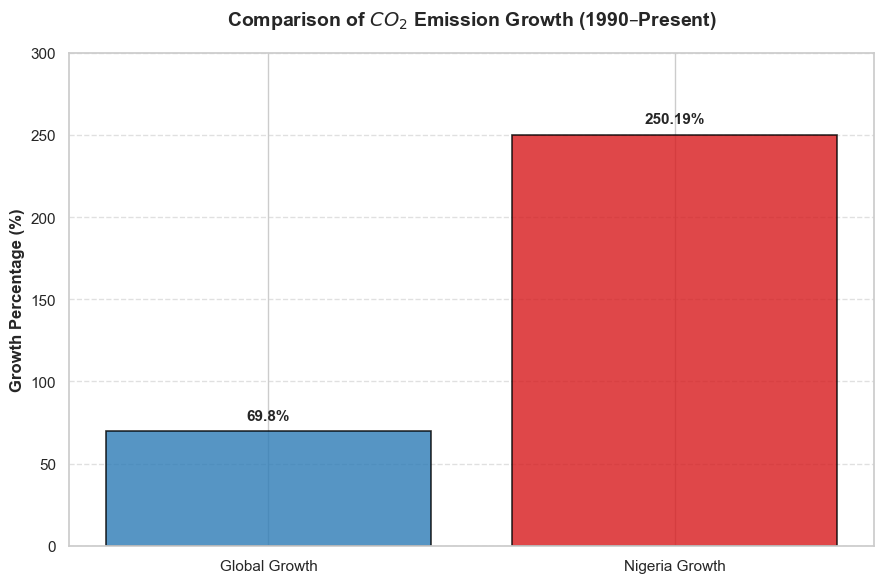

In [67]:
import matplotlib.pyplot as plt

# Data from the analysis
categories = ['Global Growth', 'Nigeria Growth']
values = [69.80, 250.19]
colors = ['#2c7bb6', '#d7191c']  # Blue for World, Red for Nigeria

# Create the plot
plt.figure(figsize=(9, 6))
bars = plt.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

# Add titles and labels
plt.title('Comparison of $CO_2$ Emission Growth (1990–Present)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Growth Percentage (%)', fontsize=12, fontweight='bold')
plt.ylim(0, 300)  # Setting limit for better visual spacing

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval}%', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Styling the grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the figure
plt.savefig('emission_growth_comparison.png', dpi=300)

**Growth Velocity:** While global emissions grew by 69.80% since 1990, Nigeria’s emissions increased by 250.19%. This indicates that Nigeria’s carbon footprint is expanding 3.58 times faster than the global average, reflecting its rapid population surge and transitioning economy.

### 9.3 Policy Implications of Divergent Growth
The comparative analysis between Nigeria and the global average reveals a critical policy paradox. While Nigeria’s absolute contribution to global $CO_2$ remains marginal, its growth velocity—exceeding the global average by a factor of 3.58—indicates a rapidly intensifying carbon trajectory.

For Nigeria’s future climate policy, this suggests that mitigation strategies cannot simply mirror Western "de-industrialization" models. Instead, policy must focus on "decoupling" economic growth from emissions. As Nigeria continues to urbanize, the priority must shift toward integrating low-carbon infrastructure and gas-to-power utilization early in the developmental cycle to prevent the "locking in" of high-emission patterns that are currently characterizing its growth velocity.

---

## 10. Nigeria’s Fuel Profile: Oil, Gas, and Flaring (1990–Present)
### 10.1 Nigeria’s Emissions by Fuel Source
>**Analytical Objective**
>
>While global emissions are predominantly driven by coal-intensive electricity generation, Nigeria’s emissions profile reflects a structurally different energy system. This section decomposes Nigeria’s carbon emissions by major fossil fuel sources—oil, natural gas, and gas flaring—to identify the dominant drivers of national emissions and assess their implications for climate accountability and mitigation strategy.

---

### 10.2 Data Preparation: Nigeria Fuel Components


In [83]:
# Filter Nigeria-specific fuel data
nigeria_fuel = (
    df_selected[df_selected['country'] == 'Nigeria']
    [['year', 'oil_co2', 'gas_co2', 'flaring_co2']]
    .dropna(subset=['oil_co2', 'gas_co2'])
    .sort_values('year')
)

nigeria_fuel.head()

,year,oil_co2,gas_co2,flaring_co2
33176,1990,29.777328,7.478224,NaN
33177,1991,31.184303,9.119696,NaN
33178,1992,35.102013,9.591595,NaN
33179,1993,33.006287,10.478186,NaN
33180,1994,23.527750,10.269119,45.527485


---

### 10.3 Nigeria Fuel Mix Over Time (Stacked Area)

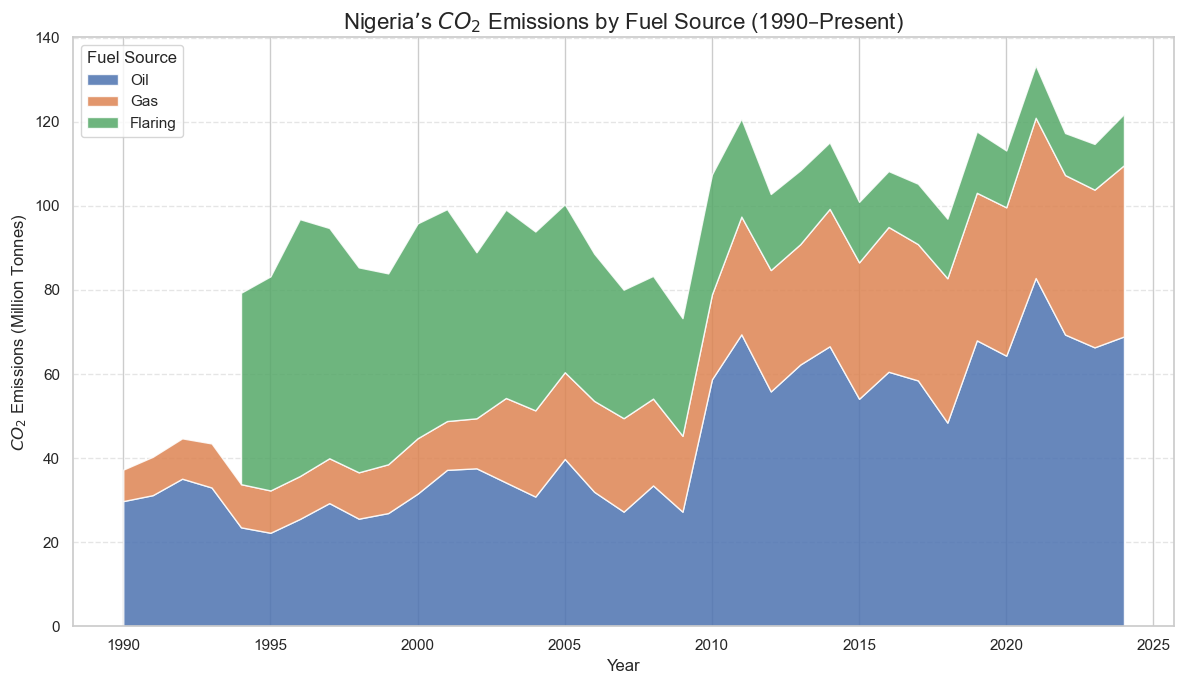

In [56]:
plt.figure(figsize=(12, 7))

plt.stackplot(
    nigeria_fuel['year'],
    nigeria_fuel['oil_co2'],
    nigeria_fuel['gas_co2'],
    nigeria_fuel['flaring_co2'],
    labels=['Oil', 'Gas', 'Flaring'],
    alpha=0.85
)

plt.title(r"Nigeria’s $CO_2$ Emissions by Fuel Source (1990–Present)", fontsize=16)
plt.xlabel("Year")
plt.ylabel(r"$CO_2$ Emissions (Million Tonnes)")
plt.legend(loc='upper left', title="Fuel Source")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---
### 10.4 Interpretive Note: Nigeria’s Emission Structure
>**Interpretive Note: Structural Drivers of Nigeria’s Emissions**
>
>The stacked area visualization reveals a fuel composition that differs markedly from the global emissions profile. Nigeria’s carbon emissions are overwhelmingly dominated by oil-related activities, with natural gas contributing a secondary but steadily increasing share.
>
>**Oil Dependence and the Power Gap:**<br> Oil-related emissions constitute the largest component throughout the period, reflecting not only Nigeria’s petroleum-based transport sector but also a unique dependence on refined fuels for decentralized electricity generation. Chronic grid instability has resulted in widespread reliance on petrol and diesel generators across households and micro-enterprises, making off-grid power generation a major contributor to oil-related emissions (Olukoju, 2004; IEA, 2019).
>
>**Gas and the Transition Narrative:**<br> The gradual rise in gas-related emissions aligns with Nigeria’s increasing utilization of natural gas for domestic power generation and industrial energy. This trend reflects a strategic policy shift toward gas-to-power infrastructure under Nigeria’s “Decade of Gas” framework, positioning natural gas as a transitional fuel capable of displacing higher-carbon diesel self-generation (Giwa et al., 2014; PwC Nigeria, 2021).
>
>**The Flaring Signature and Regulatory Accountability:**<br> Although gas flaring contributes a smaller absolute share relative to oil and gas combustion, its persistence is analytically significant. Flaring represents a largely avoidable source of emissions concentrated within the upstream oil sector. Observed reductions over time correspond with gas reinjection initiatives and commercialization efforts such as the Nigeria Gas Flare Commercialization Programme (NGFCP), yet residual flaring remains a critical accountability challenge, as it generates emissions without contributing to productive economic output (NNPC, 2021).
>
>**Comparative Insight:**<br> Relative to the global fuel mix, where coal dominates electricity generation, Nigeria’s emissions profile underscores the necessity for differentiated mitigation strategies. Because Nigeria’s carbon footprint is tied to liquid fuels and fugitive emissions rather than coal, mitigation efforts will yield the highest marginal benefits through the elimination of gas flaring, cleaner oil production practices, and the accelerated deployment of gas-to-power infrastructure. This represents a distinct departure from the coal phase-out pathways typical of industrialized nations.

---

### 10.5 Quantifying the Contribution of Gas Flaring to Nigeria’s Emissions
**What we are doing (conceptually)**<br>
We are answering one precise question:
>**What proportion of Nigeria’s total CO₂ emissions is attributable to gas flaring over time?**

This matters because:
- Flaring is largely avoidable
- It is sector-concentrated (oil & gas)
- Even a small percentage can represent a large mitigation opportunity
---
#### 10.5.1 Compute Total Emissions and Flaring Share


In [86]:
# Create total emissions from major fossil sources
nigeria_fuel['total_fossil_co2'] = (
    nigeria_fuel['oil_co2'] +
    nigeria_fuel['gas_co2'] +
    nigeria_fuel['flaring_co2']
)

# Calculate flaring share (%)
nigeria_fuel['flaring_share_percent'] = (
    nigeria_fuel['flaring_co2'] / nigeria_fuel['total_fossil_co2']
) * 100

nigeria_fuel[['year', 'flaring_share_percent']].head()

,year,flaring_share_percent
33176,1990,NaN
33177,1991,NaN
33178,1992,NaN
33179,1993,NaN
33180,1994,57.394082


#### 10.5.2 Visualize Flaring’s Share Over Time

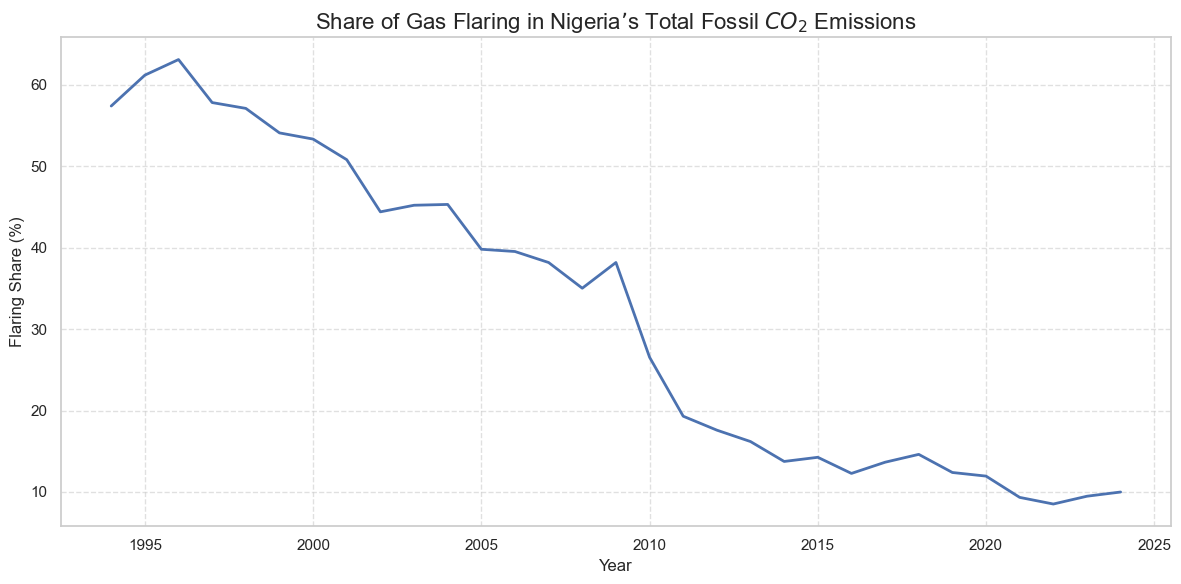

In [87]:
plt.figure(figsize=(12, 6))

plt.plot(
    nigeria_fuel['year'],
    nigeria_fuel['flaring_share_percent'],
    linewidth=2
)

plt.title(
    r"Share of Gas Flaring in Nigeria’s Total Fossil $CO_2$ Emissions",
    fontsize=16
)
plt.xlabel("Year")
plt.ylabel("Flaring Share (%)")
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 10.5.3 Interpretive Analysis: Gas Flaring as a Structural Emissions Driver
>The time series reveals that gas flaring has constituted a persistent, though varying, share of Nigeria’s total fossil-based carbon emissions over the study period. While flaring does not dominate Nigeria’s emissions in absolute terms, its contribution remains non-trivial, particularly during periods of intensified oil production and weak regulatory enforcement.
>
>The observed fluctuations in flaring’s share reflect both operational changes within the petroleum sector and the partial implementation of flaring reduction policies. Declines in later years suggest some progress toward gas capture and utilization; however, the continued presence of flaring indicates that mitigation potential remains unrealized.
>
>From a climate policy perspective, the significance of gas flaring lies not merely in its percentage contribution, but in its avoidability. Unlike emissions driven by energy demand or industrial output, flaring-related emissions can be reduced through technological upgrades, regulatory enforcement, and investment in gas-to-power infrastructure without constraining economic activity.
>
>Consequently, gas flaring represents a high-leverage mitigation target within Nigeria’s emissions profile. Its reduction would yield immediate emissions benefits while supporting broader energy transition objectives, distinguishing Nigeria’s climate mitigation pathway from coal-focused strategies prevalent in industrialized economies.

---

### 10.6 Nigeria vs Global Average Per-Capita Emissions
#### 10.6.1 Purpose of This Analysis

After comparing absolute emissions, a per-capita comparison is essential to evaluate carbon intensity and equity. This analysis answers a fundamentally different question:
>*How carbon-intensive is the average Nigerian compared to the average global citizen?*

#### 10.6.1 Core Insight (What the Data Shows)
- Nigeria’s per-capita CO₂ emissions remain consistently below the global average across the entire time series.
- While Nigeria’s per-capita emissions show gradual growth, the global average remains significantly higher due to consumption-driven lifestyles in industrialized economies.

#### 10.6.2 Interpretation
- **Equity Perspective:** Nigeria’s low per-capita emissions reinforce the argument that its climate burden is disproportionately small relative to its population.
- **Development Lens:** The observed increase reflects basic development needs—urbanization, electricity access, transport—not luxury consumption.
- **Policy Relevance:** This comparison strengthens Nigeria’s position within the framework of **Common but Differentiated Responsibilities (CBDR)** by empirically demonstrating that its per-capita contribution to global emissions remains low despite population growth.

This analysis complements the absolute-emissions comparison by showing that **Nigeria’s climate challenge is about future trajectory, not historical excess**.

---

## 5. SUMMARY, CONCLUSION, AND POLICY IMPLICATIONS
### 5.1 Summary of the Study
This study employed exploratory data analysis to examine global and national CO₂ emission patterns, with particular attention to equity, fuel composition, and developmental context. Using secondary data, the analysis progressed from global trends to a focused case study of Nigeria.

---
### 5.2 Conclusion
The findings demonstrate that climate responsibility is unevenly distributed across countries and individuals. While global emissions continue to rise, their concentration among industrialized economies contrasts sharply with the low per-capita emissions of developing countries such as Nigeria.

Nigeria’s emissions profile reflects structural characteristics tied to resource extraction rather than mass industrialization. The country’s contribution to climate change remains modest in absolute and per-capita terms, despite recent growth driven by population increase and urbanization.
Exploratory data analysis proved effective in revealing these patterns, emphasizing the importance of contextualized interpretation over aggregate statistics.

---
### 5.3 Policy Implications
The results carry several policy implications:
1. **Equity in Climate Negotiations**<br>
Nigeria’s low per-capita emissions support arguments for differentiated responsibilities and equitable mitigation frameworks.
2. **Targeted Mitigation Strategies**<br>
Emission reduction efforts should prioritize oil and gas operations rather than coal-centric policies.
3.	**Gas Flaring Reduction**<br>
Flaring presents a high-impact, low-tradeoff mitigation opportunity that aligns climate goals with economic efficiency.
4.	**Development-Sensitive Climate Action**<br>
Climate policy must accommodate Nigeria’s developmental needs while preventing long-term emissions lock-in.

---

## REFERENCES
Chakravarty, S., Chikkatur, A., de Coninck, H., Pacala, S., Socolow, R., & Tavoni, M. (2009). *Sharing global CO₂ emission reductions among one billion high emitters*. Proceedings of the National Academy of Sciences, 106(29), 11884–11888. https://doi.org/10.1073/pnas.0905232106

Davis, S. J., & Caldeira, K. (2010). *Consumption-based accounting of CO₂ emissions*. Proceedings of the National Academy of Sciences, 107(12), 5687–5692. https://doi.org/10.1073/pnas.0906974107

Friedlingstein, P., O'Sullivan, M., Jones, M. W., Andrew, R. M., Gregor, L., Hauck, J., Le Quéré, C., Luijkx, I. T., Olsen, A., Peters, G. P., Peters, W., Pongratz, J., Schwingshackl, C., Sitch, S., Canadell, J. G., Ciais, P., Jackson, R. B., Alin, S. R., Alkama, R., . . . Zhu, Z. (2023). *Global Carbon Budget 2023*. Earth System Science Data, 15(12), 5301–5369. https://doi.org/10.5194/essd-15-5301-2023

Giwa, S. O., Nwaokocha, C. N., Kuye, S. I., & Adama, O. O. (2014). **Gas flaring attendant impacts of environmental pollution and waste management in the Niger Delta, Nigeria**. Journal of Natural Gas Science and Engineering, 21, 331–344.

Grossman, G. M., & Krueger, A. B. (1995). *Economic growth and the environment*. The Quarterly Journal of Economics, 110(2), 353–377. https://doi.org/10.2307/2118443

International Energy Agency. (2019). **Africa energy outlook**. IEA.

International Energy Agency. (2022). *World energy outlook 2022*. https://www.iea.org/reports/world-energy-outlook-2022

Intergovernmental Panel on Climate Change. (2023). *Climate change 2023: Synthesis report*. https://www.ipcc.ch/report/ar6/syr/

Le Quéré, C., Andrew, R. M., Friedlingstein, P., Sitch, S., Hauck, J., Pongratz, J., Pickers, P. A., Korsbakken, J. I., Peters, G. P., Canadell, J. G., Arneth, A., Arora, V. K., Barbero, L., Bastos, A., Bopp, L., Chevallier, F., Chini, L. P., Ciais, P., Doney, S. C., . . . Zheng, B. (2018). *Global carbon budget 2018*. Earth System Science Data, 10(4), 2141–2194. https://doi.org/10.5194/essd-10-2141-2018

McKinney, W. (2018). *Python for data analysis: Data wrangling with Pandas, NumPy, and IPython (2nd ed.)*. O’Reilly Media.

Nigerian National Petroleum Corporation. (2021). **Annual statistical bulletin**. NNPC.

Olukoju, A. (2004). **Infrastructure development and urban facilities in Lagos, 1861–2000**. Ibadan University Press.

Our World in Data. (2023). *CO₂ and greenhouse gas emissions*. https://ourworldindata.org/co2-and-greenhouse-gas-emissions

Peters, G. P., Minx, J. C., Weber, C. L., & Edenhofer, O. (2011). *Growth in emission transfers via international trade from 1990 to 2008*. Proceedings of the National Academy of Sciences, 108(21), 8903–8908. https://doi.org/10.1073/pnas.1006345108

Peters, G. P., Minx, J. C., Weber, C. L., & Edenhofer, O. (2012). *Growth in emission transfers via international trade*. Environmental Research Letters, 7(1), Article 014001. https://doi.org/10.1088/1748-9326/7/1/014001

PwC Nigeria. (2021). **Nigeria’s decade of gas: Policy and investment implications**. PwC.

Ritchie, H., & Roser, M. (2020). *CO₂ and greenhouse gas emissions*. Our World in Data. https://ourworldindata.org/co2-and-greenhouse-gas-emissions

Stern, D. I. (2017). *The environmental Kuznets curve after 25 years*. Journal of Bioeconomics, 19(1), 7–28. https://doi.org/10.1007/s10818-017-9243-1

Tukey, J. W. (1977). *Exploratory data analysis*. Addison-Wesley.

United Nations Environment Programme. (2023). *Emissions gap report 2023*. https://www.unep.org/resources/emissions-gap-report-2023

Wilkinson, L. (2017). *The grammar of graphics (2nd ed.)*. Springer.

World Bank. (2023). *Global gas flaring tracker report*. World Bank Group. https://openknowledge.worldbank.org/handle/10986/39601


